In [1]:
import pandas as pd
import numpy as np
import datetime as dt # so that pandas can recognize dates properly
import matplotlib.pyplot as plt # for visualization
from matplotlib import style
import pandas_datareader.data as web # to collect data

In [2]:
style.use('ggplot')
tickers = ['TSLA', 'BAC']
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2020, 11, 20)
returns = pd.DataFrame() # create an empty data frame, returns.
returns

""


# Portfolio Optimization:
Optimal portfolio has the highest sharpe ratio
- [**Data**](#Data): Extract the data online and organize it in the data frame.


## Data

In [3]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
data
# Loop will run for the first time for TSLA, extracts the data from yahoo finance and store it in data 
#frame, data. The loop will then run for BAC, extracts the data from yahoo finance and replace the data
# in data frame, data. This is not the dataframe that we want at the end since it will contain data of
# only BAC, the last ticker in the tickers list.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.570000,57188900.0,13.512726
2014-01-02,16.160000,15.680000,15.690000,16.100000,148709900.0,13.972696
2014-01-03,16.500000,16.230000,16.270000,16.410000,129921800.0,14.241735
2014-01-06,16.730000,16.559999,16.629999,16.660000,114431300.0,14.458704
2014-01-07,16.790001,16.450001,16.770000,16.500000,110605100.0,14.319845
...,...,...,...,...,...,...
2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,26.760630
2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,26.731520
2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.178453


In [4]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
    data[ticker] = data['Adj Close'].pct_change() # add a column to data frame, data, and store returns in it.

# pd.set_option('display.max_rows', None)
data
# still same number of rows as above, so values of one firm (TSLA) replace by another firm (BAC).

,High,Low,Open,Close,Volume,Adj Close,BAC
Date,,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.570000,57188900.0,13.512726,NaN
2014-01-02,16.160000,15.680000,15.690000,16.100000,148709900.0,13.972699,0.034040
2014-01-03,16.500000,16.230000,16.270000,16.410000,129921800.0,14.241737,0.019255
2014-01-06,16.730000,16.559999,16.629999,16.660000,114431300.0,14.458703,0.015234
2014-01-07,16.790001,16.450001,16.770000,16.500000,110605100.0,14.319844,-0.009604
...,...,...,...,...,...,...,...
2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,26.760632,0.021482
2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,26.731522,-0.001088
2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.178453,-0.020690


In [5]:
13.972697 / 13.512726 - 1

# just for confirmation of the return above.

0.034039837705582165

In [6]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
data
# loop first running for TSLA, extracting its data from yahoo finance from the start to the end dates 
# and then storing it in a data frame, data. Next, data[ticker] = data[TSLA] column is created which
# contains percentage changes in the Adj Close of TSLA. Next, if-else is evaluated. In the if statement,
# returns.empty outputs True since the data frame, returns, is yet empty, which sets the data frame,
# returns, equal to data[[ticker]] or more precisely to data[[TSLA]]. This finishes the first loop.

# Then the loop runs for BAC, extracting its data from yahoo finance from the start to the end dates
# and then storing it in a data frame, data. Next, data[ticker] = data[BAC] column is created which
# is set equal to percentage changes in the Adj Close of BAC. Next, if-else is evaluated. In the if
# statement,returns.empty turns out to be False this time, therefore, else is executed, where the data 
# frame, returns which already contains the data for TSLA, now takes the data from data[[ticker]] which
# is this time equal to data[[BAC]]. Thus, the data frame, returns, now contains two columns. The first one
# contains percent changes (net returns) of TSLA and the second one contains the percent changes (net returns) of
# BAC.

# The data frame, data, will still contain 1,737 rows since it contains data only for BAC.

# The data frame, returns, will contain 1,737 rows but then two columns, one for TSLA and the other for
# BAC.

,High,Low,Open,Close,Volume,Adj Close,BAC
Date,,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.570000,57188900.0,13.512727,NaN
2014-01-02,16.160000,15.680000,15.690000,16.100000,148709900.0,13.972699,0.034040
2014-01-03,16.500000,16.230000,16.270000,16.410000,129921800.0,14.241740,0.019255
2014-01-06,16.730000,16.559999,16.629999,16.660000,114431300.0,14.458701,0.015234
2014-01-07,16.790001,16.450001,16.770000,16.500000,110605100.0,14.319846,-0.009604
...,...,...,...,...,...,...,...
2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,26.760630,0.021481
2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,26.731520,-0.001088
2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.178453,-0.020690


In [7]:
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015234
2014-01-07,0.016054,-0.009604
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [8]:
type(returns)

pandas.core.frame.DataFrame

## Determine the portfolio weights:

In [9]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(tickers))
    print(weights)
    
# Loop will run the first time for 0 and put 0 in portfolio variable. Then, np.random.random_sample(2) will run
# and produce two random numbers and store them in the variable, weights. The loop then runs for 1 in portfolio
# variable, np.random.random_sample(2) generates two random numbers and store them in the variable, weights again.
# The loop runs 5 times in total from 0 to 4. Thus, the variable, weights, contain 5 sets of 2 random numbers and
# each set can be viewed as a seperate portfolio. Hence, the total number of portfolios is equal to 5.

# But now the problem is each portfolio weight is either less than or greater than 1 or 100 percent. We overcome 
# this problem in the following as:

[0.59141331 0.38306465]
[0.37477199 0.09293465]
[0.85311195 0.61700743]
[0.48647942 0.31388212]
[0.30555805 0.99168865]


In [10]:
weights

array([0.30555805, 0.99168865])

In [11]:
weights[0] + weights[1] # these will change every time we run the cells above.

1.2972466992577179

In [12]:
np.sum(weights)

1.2972466992577179

In [13]:
weights / np.sum(weights) # to impose constraint on weights to be equal to 1.

array([0.23554351, 0.76445649])

In [14]:
weights = weights / np.sum(weights)

In [15]:
weights[0] + weights[1] # Now the sum of the weights invested in both the assets is precesiely equal to 1.

1.0

In [16]:
weights = 0 # to start fresh for the following loop.
weights

0

In [17]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(tickers))
    weights = weights / np.sum(weights)
    print(weights)
    
# Now the weights invested in each portfolio is equal to 1.

[0.61903202 0.38096798]
[0.61280874 0.38719126]
[0.87474197 0.12525803]
[0.83537394 0.16462606]
[0.50133587 0.49866413]


In [18]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [19]:
weights = 0 # to start fresh for the following loop.
weights

0

In [20]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)

print(portfolio_weights)

[array([0.316, 0.684]), array([0.614, 0.386]), array([0.005, 0.995]), array([0.842, 0.158]), array([0.307, 0.693])]


## Compute Annualized Portfolio Returns:

In [21]:
returns # the data frame, returns, contains daily returns of the 2 stocks.

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015234
2014-01-07,0.016054,-0.009604
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [22]:
returns.mean() 
# generates daily mean return for the two stocks. TSLA on average generates a daily return of $0.0022 per dollar
# investment or $0.22 per 100 dollar investment.

TSLA    0.002186
BAC     0.000582
dtype: float64

In [23]:
weights # the weights of both the assets in a portfolio.

array([0.307, 0.693])

In [24]:
weights[0], weights[1]

(0.307, 0.693)

In [25]:
0.002186 * weights[0] + 0.000582 * weights[1] 
# Portfolio of these weights generate daily expected return of $0.0014 per dollar investment or return of $0.14 
# per 100 dollar investment.

0.001074428

In [26]:
np.sum(returns.mean() * weights) 

# generates the portfolio's daily expected return given the means and weights. We cannot change the mean daily 
# returns but can change the weights, which will change the portfolio's expected return.

# Investing 52.7% of the total available funds in TSLA and 47.3% in BAC has the expected daily portfolio return of
# $0.00143 per dollar of investment or $0.143 per 100 dollars of investment. 

0.0010742228562874248

In [27]:
np.sum(returns.mean() * weights) * 252 
# 252 days since stock markets usally trade for 252 days in a year.
# generates annualized return of the portfolio. So, $1 invested in this portfolio is expected to generate a return
# of almost $0.25 in a year or $100 invested in this portfolio is expected to generate a return of almost $25 in a
# year.

0.270704159784431

In [28]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, rf, weights

([],
 [],
 [],
 [array([0.316, 0.684]),
  array([0.614, 0.386]),
  array([0.005, 0.995]),
  array([0.842, 0.158]),
  array([0.307, 0.693])],
 0,
 array([0.307, 0.693]))

In [29]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

# to start fresh for the following loop.

In [30]:
weights = 0

In [31]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    annualized_return = np.round((annualized_return), 3)
    portfolio_return.append(annualized_return)

print(portfolio_weights)
print(portfolio_return)

[array([0.667, 0.333]), array([0.461, 0.539]), array([1., 0.]), array([0.296, 0.704]), array([0.157, 0.843])]
[0.416, 0.333, 0.551, 0.266, 0.21]


## Compute Covariance Matrix and Portfolio's Risk:

In [32]:
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015234
2014-01-07,0.016054,-0.009604
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [33]:
returns.cov()

,TSLA,BAC
TSLA,0.001160,0.000187
BAC,0.000187,0.000410


In [34]:
returns.cov() * 252

,TSLA,BAC
TSLA,0.292387,0.047138
BAC,0.047138,0.103215


In [35]:
covariance_matrix = returns.cov() * 252
covariance_matrix

,TSLA,BAC
TSLA,0.292387,0.047138
BAC,0.047138,0.103215


In [36]:
weights

array([0.157, 0.843])

In [37]:
weights.T # step A in excel.

array([0.157, 0.843])

In [38]:
np.dot(covariance_matrix, weights) # step B in excel.

array([0.08564186, 0.09441105])

In [39]:
np.dot(weights.T, np.dot(covariance_matrix, weights)) # step C in excel.

0.09303428690531006

In [40]:
portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
portfolio_variance

0.09303428690531006

In [41]:
standard_deviation = np.sqrt(portfolio_variance)
standard_deviation

0.30501522405498066

In [42]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, weights, annualized_return, rf

([0.416, 0.333, 0.551, 0.266, 0.21],
 [],
 [],
 [array([0.667, 0.333]),
  array([0.461, 0.539]),
  array([1., 0.]),
  array([0.296, 0.704]),
  array([0.157, 0.843])],
 array([0.157, 0.843]),
 0.21,
 0)

In [43]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

# to start fresh for the following loop.

In [44]:
weights = 0
annualized_return = 0

In [45]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)

print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)

[array([0.197, 0.803]), array([0.616, 0.384]), array([0.595, 0.405]), array([0.211, 0.789]), array([0.006, 0.994])]
[0.22624037740199435, 0.3956069666587307, 0.38711842638572, 0.2318994042506681, 0.1490350825379451]
[0.30465533668523836, 0.38531537417807726, 0.3783651099543409, 0.30490307072877015, 0.320239171969772]


## Compute Sharpe Ratio

In [46]:
annualized_return # the portfolio's expected annual return.

0.1490350825379451

In [47]:
rf

0

In [48]:
annualized_return - rf

0.1490350825379451

In [49]:
portfolio_standard_deviation

0.320239171969772

In [50]:
shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation

In [51]:
shrp_ratio
# risk premium per unit of risk. The higher the shrp ratio is, the better it is.

0.4653867970655783

In [52]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, weights, annualized_return, rf

([0.22624037740199435,
  0.3956069666587307,
  0.38711842638572,
  0.2318994042506681,
  0.1490350825379451],
 [0.30465533668523836,
  0.38531537417807726,
  0.3783651099543409,
  0.30490307072877015,
  0.320239171969772],
 [],
 [array([0.197, 0.803]),
  array([0.616, 0.384]),
  array([0.595, 0.405]),
  array([0.211, 0.789]),
  array([0.006, 0.994])],
 array([0.006, 0.994]),
 0.1490350825379451,
 0)

In [53]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [54]:
weights = 0
annualized_return = 0

In [55]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)
print(sharpe_ratio)

[array([0.553, 0.447]), array([0.671, 0.329]), array([0.497, 0.503]), array([0.908, 0.092]), array([0.144, 0.856])]
[0.37014134583969877, 0.4178388578499491, 0.34750523844500364, 0.5136380980739264, 0.20481691861772933]
[0.36516010738812793, 0.40451058562229236, 0.3491483647368537, 0.49981137093294414, 0.3054721100122615]
[1.013641244897204, 1.0329491308791159, 0.9952939023698752, 1.027663890709756, 0.6704930234367651]


In [56]:
# Based on the Sharpe Ratio, the portfolio 5 is the best among all the five portfolios since it has the highest Sharpe 
# Ratio, thus, the highest risk premium it offers per unit of risk.

In [57]:
type(portfolio_weights), type(portfolio_return), type(portfolio_risk), type(sharpe_ratio)

(list, list, list, list)

In [58]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)
# change the lists to numpy arrays for better data manipulations.

In [59]:
print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)
print(sharpe_ratio)

# list items are seperated by commas, where arrays elements are not it appears.

[[0.553 0.447]
 [0.671 0.329]
 [0.497 0.503]
 [0.908 0.092]
 [0.144 0.856]]
[0.37014135 0.41783886 0.34750524 0.5136381  0.20481692]
[0.36516011 0.40451059 0.34914836 0.49981137 0.30547211]
[1.01364124 1.03294913 0.9952939  1.02766389 0.67049302]


In [60]:
type(portfolio_weights), type(portfolio_return), type(portfolio_risk), type(sharpe_ratio)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [61]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]
portfolio_metrics

[array([0.37014135, 0.41783886, 0.34750524, 0.5136381 , 0.20481692]),
 array([0.36516011, 0.40451059, 0.34914836, 0.49981137, 0.30547211]),
 array([1.01364124, 1.03294913, 0.9952939 , 1.02766389, 0.67049302]),
 array([[0.553, 0.447],
        [0.671, 0.329],
        [0.497, 0.503],
        [0.908, 0.092],
        [0.144, 0.856]])]

In [62]:
portfolio_df = pd.DataFrame(portfolio_metrics)
portfolio_df

# row 0 is portfolio_return, row 1 is portfolio_risk, row 3 is sharpe_ratio, and row 4 is portfolio_weights.

,0,1,2,3,4
0,0.370141,0.417839,0.347505,0.513638,0.204817
1,0.36516,0.404511,0.349148,0.499811,0.305472
2,1.013641,1.032949,0.995294,1.027664,0.670493
3,"[0.553, 0.447]","[0.671, 0.329]","[0.497, 0.503]","[0.908, 0.092]","[0.144, 0.856]"


In [63]:
portfolio_df = portfolio_df.T
portfolio_df

# now column 0 is portfolio_return, column 1 is portfolio_risk, column 2 is sharpe_ratio, and column 4 is portfolio
# _weights.

,0,1,2,3
0,0.370141,0.36516,1.013641,"[0.553, 0.447]"
1,0.417839,0.404511,1.032949,"[0.671, 0.329]"
2,0.347505,0.349148,0.995294,"[0.497, 0.503]"
3,0.513638,0.499811,1.027664,"[0.908, 0.092]"
4,0.204817,0.305472,0.670493,"[0.144, 0.856]"


In [64]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.370141,0.36516,1.013641,"[0.553, 0.447]"
1,0.417839,0.404511,1.032949,"[0.671, 0.329]"
2,0.347505,0.349148,0.995294,"[0.497, 0.503]"
3,0.513638,0.499811,1.027664,"[0.908, 0.092]"
4,0.204817,0.305472,0.670493,"[0.144, 0.856]"


## Everything Together:

In [65]:
returns, portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, rf, weights, annualized_return
# the data carried forward from previous work. It needs to be deleted to run the following loops.

(                TSLA       BAC
 Date                          
 2013-12-31       NaN       NaN
 2014-01-02 -0.002194  0.034040
 2014-01-03 -0.003598  0.019255
 2014-01-06 -0.017117  0.015234
 2014-01-07  0.016054 -0.009604
 ...              ...       ...
 2020-11-16 -0.001004  0.021481
 2020-11-17  0.082139 -0.001088
 2020-11-18  0.101968 -0.020690
 2020-11-19  0.025953  0.000000
 2020-11-20 -0.019348 -0.006301
 
 [1737 rows x 2 columns],
 array([0.37014135, 0.41783886, 0.34750524, 0.5136381 , 0.20481692]),
 array([0.36516011, 0.40451059, 0.34914836, 0.49981137, 0.30547211]),
 array([1.01364124, 1.03294913, 0.9952939 , 1.02766389, 0.67049302]),
 array([[0.553, 0.447],
        [0.671, 0.329],
        [0.497, 0.503],
        [0.908, 0.092],
        [0.144, 0.856]]),
 0,
 array([0.144, 0.856]),
 0.20481691861772933)

In [66]:
returns = pd.DataFrame()
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0
weights = 0
annualized_return = 0

In [67]:
tickers = ['TSLA', 'BAC']
returns = pd.DataFrame()

In [68]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
        
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015235
2014-01-07,0.016054,-0.009604
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [69]:
number_of_portfolios = 10000
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

# print(portfolio_weights)
# print(portfolio_return)
# print(portfolio_risk)
# print(sharpe_ratio)

# comment out the print statements since this is too much output.

In [70]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)

In [71]:
# print(portfolio_weights)
# print(portfolio_return)
# print(portfolio_risk)
# print(sharpe_ratio)

# comment out these print statement since this will be too much of the output.

In [72]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]
#portfolio_metrics

# comment out printing of the portfolio_metrics due too much output.

In [73]:
portfolio_df = pd.DataFrame(portfolio_metrics)
#portfolio_df

In [74]:
portfolio_df = portfolio_df.T
#portfolio_df

In [75]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.399649,0.388701,1.028165,"[0.626, 0.374]"
1,0.350739,0.351316,0.998358,"[0.505, 0.495]"
2,0.38914,0.38,1.024052,"[0.6, 0.4]"
3,0.366908,0.362756,1.011443,"[0.545, 0.455]"
4,0.397224,0.386664,1.02731,"[0.62, 0.38]"
...,...,...,...,...
9995,0.29617,0.320889,0.922968,"[0.37, 0.63]"
9996,0.37095,0.365767,1.01417,"[0.555, 0.445]"
9997,0.361653,0.358931,1.007583,"[0.532, 0.468]"
9998,0.373375,0.3676,1.015709,"[0.561, 0.439]"


### Identify a minimum risk portfolio:

In [76]:
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.399649,0.388701,1.028165,"[0.626, 0.374]"
1,0.350739,0.351316,0.998358,"[0.505, 0.495]"
2,0.38914,0.38,1.024052,"[0.6, 0.4]"
3,0.366908,0.362756,1.011443,"[0.545, 0.455]"
4,0.397224,0.386664,1.02731,"[0.62, 0.38]"
...,...,...,...,...
9995,0.29617,0.320889,0.922968,"[0.37, 0.63]"
9996,0.37095,0.365767,1.01417,"[0.555, 0.445]"
9997,0.361653,0.358931,1.007583,"[0.532, 0.468]"
9998,0.373375,0.3676,1.015709,"[0.561, 0.439]"


In [77]:
portfolio_df['Risk'].astype(float).idxmin() # returns the row index of minimum risk, which in this case is 1.

3312

In [78]:
portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()] 
#.iloc gets 1, so portfolio_df.iloc[1] produces the entire row indexed 1.

Return           0.221794
Risk             0.304597
Sharpe           0.728157
Weights    [0.186, 0.814]
Name: 3312, dtype: object

In [79]:
min_risk_portfolio = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
min_risk_portfolio

# among all the known portfolios, this is the one with the minimum risk.

Return           0.221794
Risk             0.304597
Sharpe           0.728157
Weights    [0.186, 0.814]
Name: 3312, dtype: object

In [80]:
max_return_portfolio = portfolio_df.iloc[portfolio_df['Return'].astype(float).idxmax()]
max_return_portfolio

# among all the known portfolios, this is the one with the maximum return.

Return       0.550826
Risk         0.540728
Sharpe       1.018675
Weights    [1.0, 0.0]
Name: 2016, dtype: object

In [81]:
max_sharpe_portfolio = portfolio_df.iloc[portfolio_df['Sharpe'].astype(float).idxmax()]
max_sharpe_portfolio

# among all the known portfolios, this is the one with the maximum sharpe ratio.

Return           0.448559
Risk             0.433103
Sharpe           1.035687
Weights    [0.747, 0.253]
Name: 181, dtype: object

In [82]:
print('Minimum Risk Portfolio')
print(min_risk_portfolio)
print(tickers)
print('')

print('Maximum Return Portfolio')
print(max_return_portfolio)
print(tickers)
print('')

print('Maximum Sharpe Ratio Portfolio')
print(max_sharpe_portfolio)
print(tickers)
print('')

Minimum Risk Portfolio
Return           0.221794
Risk             0.304597
Sharpe           0.728157
Weights    [0.186, 0.814]
Name: 3312, dtype: object
['TSLA', 'BAC']

Maximum Return Portfolio
Return       0.550826
Risk         0.540728
Sharpe       1.018675
Weights    [1.0, 0.0]
Name: 2016, dtype: object
['TSLA', 'BAC']

Maximum Sharpe Ratio Portfolio
Return           0.448559
Risk             0.433103
Sharpe           1.035687
Weights    [0.747, 0.253]
Name: 181, dtype: object
['TSLA', 'BAC']



### Visualization:

In [83]:
# portfolio_risk # will be shown along x-axis. Commented out due too much output.

In [84]:
# portfolio_return # will be shown along y-axis. Commented out due too much output.

In [85]:
# portfolio_return / portfolio_risk # commented out due to too much output.

C:\Users\AITZAZ~1\AppData\Local\Temp/ipykernel_14808/2933732217.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label = 'Sharpe Ratio')


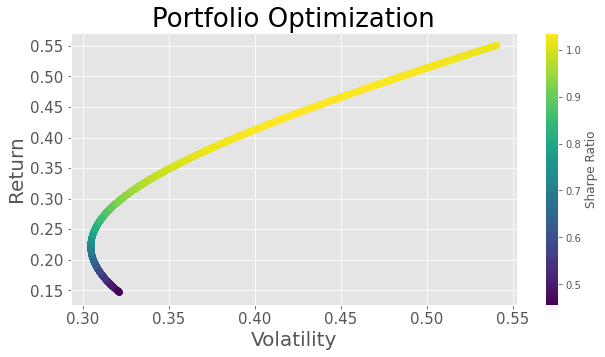

In [86]:
plt.figure(figsize = (10, 5))
plt.scatter(portfolio_risk, portfolio_return, c = portfolio_return / portfolio_risk) # c for colorbar based on sharpe.

plt.title('Portfolio Optimization', fontsize = 26)

plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.colorbar(label = 'Sharpe Ratio')

plt.show()

# Note first run for TSLA and BCA for 5 portfolios, and then 100 portfolios and then 10000 portfolios.
# Finally, make it 5 stocks and 20000 portfolios.


### Comparison with individual assets:

In [87]:
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015235
2014-01-07,0.016054,-0.009604
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [88]:
returns.mean() # daily returns of the two stocks.

TSLA    0.002186
BAC     0.000582
dtype: float64

In [89]:
returns.std() # dailty standard deviation of the two stocks.

TSLA    0.034063
BAC     0.020238
dtype: float64

In [90]:
returns.mean() * 252 # annual returns of the two stocks.

TSLA    0.550826
BAC     0.146610
dtype: float64

In [91]:
returns.std() * 252 # annual standard deviations of the two stocks.

TSLA    8.583791
BAC     5.100022
dtype: float64

In [92]:
returns.std() * np.sqrt(252) # annual standard deviations of the two stocks. This one seems more reasonable. 
# check out this link: https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx

TSLA    0.540728
BAC     0.321271
dtype: float64